<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Меры качества кластеризации, уменьшение размерности признаков (практика)</center></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print u'Так надо'

# Качество алгоритмов кластеризации

#### Задание
Запустите метод k-средних для данных ниже, расчитайте меру качества ARI по отношению к истинному разбиению в переменной `y` и меру `silhouette`.

Все должно получится идеально (ну или почти)!

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_samples, silhouette_score

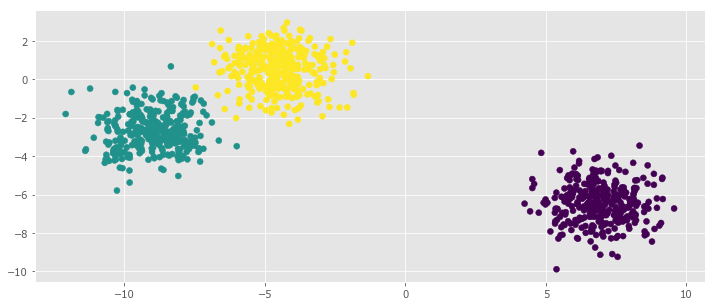

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2,
                  centers=3, random_state=15)
plt.scatter(X[:,0], X[:,1], c=y)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_hat = kmeans.labels_

In [6]:
adjusted_rand_score(y, y_hat)

0.99401205420382321

In [7]:
sil = silhouette_samples(X, y_hat)

In [9]:
sil.mean()

0.74149317545475291

In [10]:
silhouette_score(X, y_hat)

0.74149317545475291

In [13]:
sils_scores = pd.DataFrame(np.c_[y_hat, sil], columns=['labels', 'sil'])

In [14]:
sils_scores = sils_scores.sort_values(['labels', 'sil'])

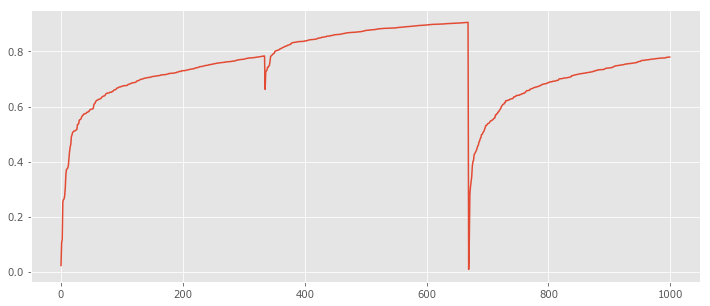

In [17]:
plt.plot(sils_scores.sil.values)

#### Задание
Давайте чуть-чуть изменим данные.

Попробуем прокластеризовать их с помощью k-means и GMM (EM-алгоритма с гауссовскими распределениями).

Вновь оценим качество с помощью ARI и `silhouette`.

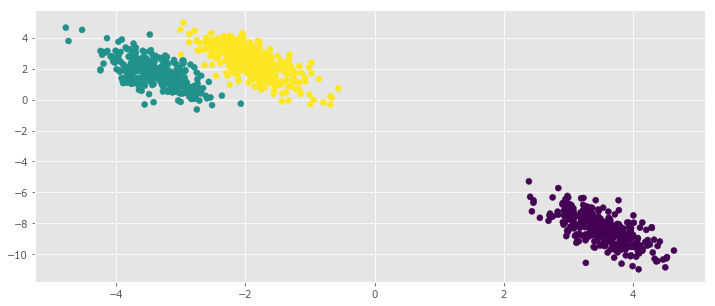

In [18]:
from sklearn.mixture import GaussianMixture
Trans = [[ 0.40834549, -0.43667341],
         [-0.10887718, 0.829]]
X_t = X.dot(Trans)
plt.scatter(X_t[:,0], X_t[:,1], c=y)

In [22]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_t)
y_hat = kmeans.labels_

In [23]:
adjusted_rand_score(y, y_hat)

0.5809636401507724

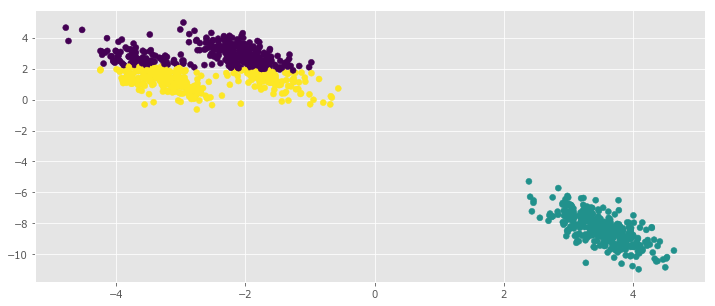

In [24]:
plt.scatter(X_t[:,0], X_t[:,1], c=y_hat)

In [25]:
gmm = GaussianMixture(n_components=3)
gmm.fit(X_t)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [26]:
gmm.means_

array([[ 3.52848333, -8.35644743],
       [-1.89749366,  2.39960211],
       [-3.36550676,  1.69037019]])

In [27]:
gmm.covariances_

array([[[ 0.17925135, -0.28507975],
        [-0.28507975,  0.9431988 ]],

       [[ 0.1849578 , -0.30840977],
        [-0.30840977,  0.97886067]],

       [[ 0.17544784, -0.24394595],
        [-0.24394595,  0.80090286]]])

In [28]:
y_hat_proba = gmm.predict_proba(X_t)

In [29]:
y_hat_proba[:10]

array([[  3.10517401e-54,   1.03331567e-07,   9.99999897e-01],
       [  1.00000000e+00,   7.71549023e-39,   1.13404842e-62],
       [  4.52559053e-77,   5.57408846e-09,   9.99999994e-01],
       [  1.39809682e-59,   1.13698267e-04,   9.99886302e-01],
       [  2.98449185e-24,   9.99999928e-01,   7.15051489e-08],
       [  3.99661792e-50,   1.63620622e-06,   9.99998364e-01],
       [  6.44576239e-57,   5.72446154e-10,   9.99999999e-01],
       [  1.00000000e+00,   2.95859568e-35,   5.27734551e-58],
       [  1.85116510e-48,   4.17117208e-06,   9.99995829e-01],
       [  1.23023688e-44,   9.99999911e-01,   8.90843167e-08]])

In [30]:
y_hat = gmm.predict(X_t)

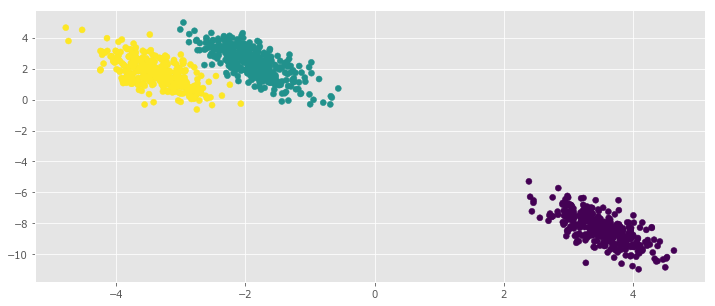

In [32]:
plt.scatter(X_t[:,0], X_t[:,1], c=y_hat)

# Метод главных компонент

## Игрушечный пример

In [33]:
from sklearn.decomposition import PCA
from numpy.linalg import svd
from sklearn.datasets import load_digits

In [59]:
C = np.array([[0., -0.7], [1.5, 0.7]])
X = np.dot(np.random.randn(200, 2) + np.array([4, 2]), C)
X = (X - X.mean(axis=0))/X.std(axis=0)

(-2.5825621039097673,
 3.0865162215782718,
 -3.0841360265575322,
 3.318118582455909)

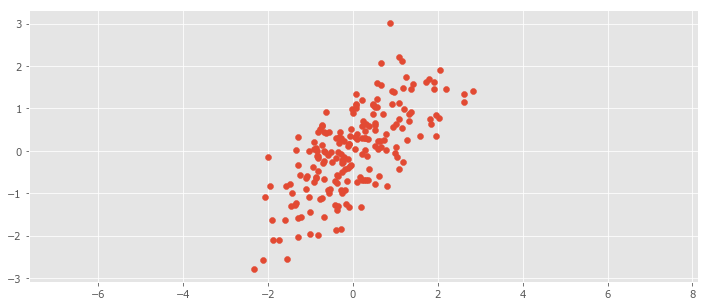

In [60]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

##### Sklearn!

In [36]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
PC = pca.transform(X)

In [39]:
PC[:10]

array([[-2.0724908 ,  0.76372169],
       [ 0.09073839,  0.49371727],
       [ 2.30836742,  0.38018159],
       [-2.48583461, -0.6658551 ],
       [ 0.4439517 ,  1.02963564],
       [ 0.56131891,  0.60855348],
       [-1.08586079, -0.75526721],
       [-2.53906011,  0.34133958],
       [-0.86210177,  0.70011423],
       [ 1.45937947,  0.1560821 ]])

In [40]:
pca.explained_variance_ratio_

array([ 0.86167989,  0.13832011])

In [41]:
pca.components_

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

(-3.4458712311806332,
 4.1615140289543708,
 -1.4937510315389237,
 1.5502813091294556)

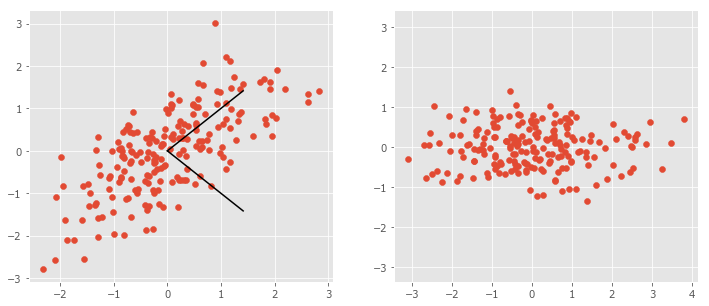

In [67]:
fig, ax = plt.subplots(1, 2)
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].plot([0, pca.components_[0,0]*2],[0, pca.components_[1,0]*2], c='black')
ax[0].plot([0, pca.components_[0,1]*2],[0, pca.components_[1,1]*2], c='black')

ax[1].scatter(PC[:, 0], PC[:, 1])

plt.axis('equal')

#### Сделаем все тоже самое через  SVD

In [42]:
U, S, V_T = svd(X)

In [43]:
U.shape

(200, 200)

In [44]:
S.shape

(2,)

In [45]:
V_T.shape

(2, 2)

In [48]:
PC[:10]

array([[-2.0724908 ,  0.76372169],
       [ 0.09073839,  0.49371727],
       [ 2.30836742,  0.38018159],
       [-2.48583461, -0.6658551 ],
       [ 0.4439517 ,  1.02963564],
       [ 0.56131891,  0.60855348],
       [-1.08586079, -0.75526721],
       [-2.53906011,  0.34133958],
       [-0.86210177,  0.70011423],
       [ 1.45937947,  0.1560821 ]])

In [50]:
PC_svd = X.dot(V_T.T)

##### Через матрицу ковариации

In [51]:
E = X.T.dot(X)

In [53]:
from numpy.linalg import eig

In [55]:
lamb, W = eig(E)

In [75]:
lamb

array([  55.32804378,  344.67195622])

In [77]:
S**2

array([ 344.67195622,   55.32804378])

In [78]:
(S**2)/(S**2).sum()

array([ 0.86167989,  0.13832011])

In [79]:
pca.explained_variance_ratio_

array([ 0.86167989,  0.13832011])

In [73]:
W

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [ ]:
plt

## Чиселки

In [68]:
digits = load_digits()
X = digits.images
y = digits.target

In [69]:
X.shape

(1797, 8, 8)

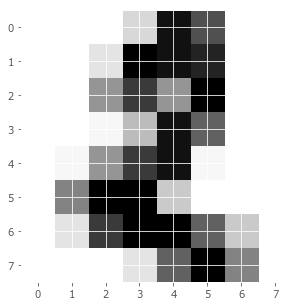

In [70]:
plt.imshow(X[2,:], cmap='Greys', interpolation='none')

#### Задание
* Переведите изображения к формату "матрица объект-признак" (reshape)
* Выполните PCA c двумя компонентами и изобратите полученные точки на плоскости, раскаживая каждую точку в отдельный цвет в соответствии с `y`
* Отнормируйте данные, запустите SVD, домножте `X` на нужную матрицу и убедитесь, что у вас получается тот же результат

In [84]:
X = X.reshape(-1, 64)
X = (X - X.mean(axis=0))/X.std(axis=0)

In [85]:
X[np.isnan(X)] = 0

In [86]:
pca = PCA(n_components=2)
pca.fit(X)
PC_digits = pca.transform(X)


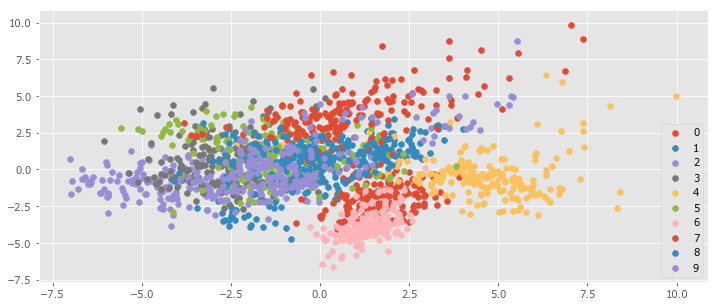

In [89]:
for i in range(10):
    idx = y == i
    plt.scatter(PC_digits[idx, 0], PC_digits[idx, 1], label=i)
    
plt.legend()

## Пищевая ценность продуктов

* Загрузите набор данных о пищевом рационе в разных странах мира `diet.csv`
* Примените на данных PCA с 2 компонентами
* Изобразите объекты в сжатом пространстве

In [95]:
df = pd.read_csv('diet-forcsv - Sheet 1.csv', sep=',')

In [98]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average latitude (º),86.0,21.928023,27.122401,-41.0,6.125000,24.50,43.750000,65.000000
Annual insolation (W.h/m2.day),86.0,353.273256,57.449854,214.8,313.900000,366.80,406.425000,417.400000
Energy (kcal/day),86.0,2893.604651,514.541287,1860.0,2467.500000,2940.00,3247.500000,3770.000000
Protein (g/day),86.0,81.569767,22.686892,32.0,59.250000,83.00,98.250000,124.000000
Fats (g/day),86.0,89.918605,39.063211,20.0,58.250000,84.50,123.250000,170.000000
Carbohydrates (g/day),86.0,439.514535,57.347552,294.5,400.250000,444.50,474.437500,614.000000
Animal Products + (kcal/day),86.0,597.500000,367.916543,52.0,298.750000,531.50,885.500000,1340.000000
Animal Fats (kcal/day),86.0,94.848837,101.399677,2.0,23.250000,61.50,124.750000,453.000000
Bovine Meat (kcal/day),86.0,55.093023,48.582647,2.0,24.250000,38.50,76.250000,342.000000
"Butter, Ghee (kcal/day)",86.0,32.732558,40.302802,0.0,4.000000,15.00,52.750000,213.000000


* Скорее всего вы обнаружите некоторые выбросы, с этим ничего не поделать - PCA чувствителен к выбросам
* Удалите объекты-выборосы и повторите процедуру
* Постарайтесь проинтерпретировать главные компоненты

# T-SNE

#### Задание
Выполните многомерное шкалирование данных с цифрами с помощью tsne.

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
## Your Code Here